# 73 Strings 
## Case Study
## Internship Assignment
### Vishwas Saini
#### vishwas.saini@st.niituniversity.in
#### 8198916290
Objective – Scrape the customer reviews for 10 mobile phones listed on Amazon and perform Sentiment Analysis for the customer reviews.

## Go to amazon.in and scrape the customer reviews of 100 mobile phones

In [1]:
!pip install selectorlib

In [2]:
# import packages
from selectorlib import Extractor
import requests 
import json 
import csv
from dateutil import parser as dateparser
from bs4 import BeautifulSoup
import requests
import time
print("Setup Complete")

In [3]:
# Create an Extractor by reading from the YAML file
e = Extractor.from_yaml_file('selectors.yml')

In [4]:
def scrape(url):
	headers = {
		'authority': 'www.amazon.in',
		'pragma': 'no-cache',
		'cache-control': 'no-cache',
		'dnt': '1',
		'upgrade-insecure-requests': '1',
		'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.74 Safari/537.36 Edg/79.0.309.43',
		'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
		'sec-fetch-site': 'none',
		'sec-fetch-mode': 'navigate',
		'sec-fetch-dest': 'document',
		'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
	}

	# Download the page using requests
	print("Downloading %s"%url)
	r = requests.get(url, headers=headers)
	# Simple check to check if page was blocked (Usually 503)
	if r.status_code > 500:
		if "To discuss automated access to Amazon data please contact" in r.text:
			print("Page %s was blocked by Amazon. Please try using better proxies\n"%url)
		else:
			print("Page %s must have been blocked by Amazon as the status code was %d"%(url,r.status_code))
		return None
	# Pass the HTML of the page and create
	return e.extract(r.text)

In [5]:
def do(url, x, y):
    """
    Input: Url: review Page Url
            x: Starting Page of reviews
            y: page until we need reviews  
    """
    url = f'https://www.amazon.in{url}'
    data = scrape(url)
    if data:
        for r in data['reviews']:
            r["product"] = data["product_title"]
            r['url'] = url
            if 'verified' in r:
                r['verified'] = 'Yes'
            r['rating'] = r['rating'].split(' out of')[0]
            date_posted = r['date'].split('on ')[-1]
            r['date'] = dateparser.parse(date_posted).strftime('%d %b %Y')
            writer.writerow(r)
    if x == int(y):
        return
    else:
        do(data['next_page'], x + 1, y)

In [18]:
# First 4 page of phone category
urls = ["https://www.amazon.in/s?i=electronics&bbn=1389401031&rh=n%3A976419031%2Cn%3A1389401031%2Cn%3A1389432031&s=popularity-rank&dc&qid=1597003716&rnid=1389401031&ref=sr_nr_n_2", "https://www.amazon.in/s?rh=n%3A976419031%2Cn%3A%21976420031%2Cn%3A1389401031%2Cn%3A1389432031&page=2&qid=1596998962&ref=lp_1389432031_pg_2", "https://www.amazon.in/s?i=electronics&rh=n%3A976419031%2Cn%3A976420031%2Cn%3A1389401031%2Cn%3A1389432031&page=3&qid=1596999009&ref=sr_pg_3", "https://www.amazon.in/s?i=electronics&rh=n%3A976419031%2Cn%3A976420031%2Cn%3A1389401031%2Cn%3A1389432031&page=4&qid=1596999106&ref=sr_pg_3"]
review_links = []
for url in urls:
    # add header
    headers = {
        'authority': 'www.amazon.in',
        'pragma': 'no-cache',
        'cache-control': 'no-cache',
        'dnt': '1',
        'upgrade-insecure-requests': '1',
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.74 Safari/537.36 Edg/79.0.309.43',
        'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
        'sec-fetch-site': 'none',
        'sec-fetch-mode': 'navigate',
        'sec-fetch-dest': 'document',
        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }
    r = requests.get(url, headers=headers)
    soup = BeautifulSoup(r.content, "lxml")
    
    # getting link of all phones in top 4 page of amazon.in
    links = soup.find_all('a', {'class': 'a-link-normal a-text-normal'})
    
    # getting links to review page
    for link in links:
        l = link.get('href')
        phoneurl = f'https://www.amazon.in{l}'
        r = requests.get(phoneurl, headers=headers)
        soup = BeautifulSoup(r.content, "lxml")
        for review_link in soup.find_all('a', {'class': 'a-link-emphasis a-text-bold'}):
            # print(review_link)
            review_links.append(review_link.get('href'))

<a class="a-link-emphasis a-text-bold" data-hook="see-all-reviews-link-foot" href="/Samsung-Galaxy-Ocean-128GB-Storage/product-reviews/B07HGGYWL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&amp;reviewerType=all_reviews">See all reviews from India</a>
<a class="a-link-emphasis a-text-bold" data-hook="see-all-reviews-link-foot" href="/Test-Exclusive-614/product-reviews/B07HGJJ559/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&amp;reviewerType=all_reviews">See all reviews from India</a>
<a class="a-link-emphasis a-text-bold" data-hook="see-all-reviews-link-foot" href="/Redmi-Note-Pebble-128GB-Storage/product-reviews/B08695YRKV/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&amp;reviewerType=all_reviews">See all reviews from India</a>
<a class="a-link-emphasis a-text-bold" data-hook="see-all-reviews-link-foot" href="/Redmi-8A-Dual-Blue-Storage/product-reviews/B07X4R63DF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&amp;reviewerType=all_reviews">See all reviews from India</a>
<a class="a-link-emphasis a-text-bold" data-hook="see-a

In [22]:
# scraping data and saving in data.csv
# here I'm taking reviews from page 1 to page 5
with open('data.csv','w') as outfile:
    writer = csv.DictWriter(outfile, fieldnames=["title","content","date","variant","images","verified","author","rating","product","url"],quoting=csv.QUOTE_ALL)
    writer.writeheader()
    for url in review_links:
        try:
            do(url, 0, 5)
        except:
            print("Connection refused by the server..")
            print("sleep for 5 seconds")
            time.sleep(5)
            print("continue...")
        continue

Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continue...
Connection refused by the server..
sleep for 5 seconds
continu

## Sentiment Analysis

### Initial Setup

In [225]:
!pip install vaderSentiment

In [226]:
# import packages
import numpy as np
import pandas as pd
from collections import Counter

import string
import nltk   
import re
from nltk.corpus import stopwords
from nltk import PorterStemmer
nltk.download('stopwords')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from wordcloud import WordCloud
print("Setup Complete")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Setup Complete


In [227]:
data=pd.read_csv('data.csv')

In [228]:
data.head(1)

,title,content,date,variant,images,verified,author,rating,product,url
0,Samsung m31 all rounder best mobile.,"Best camera, very good battery life, eat body material, average weight, best performance, best display.",09 Mar 2020,"Colour: Blue Style name: 6GB RAM, 64GB Storage",NaN,Yes,shailesh,5.0,"Samsung Galaxy M31 (Ocean Blue, 6GB RAM, 128GB Storage)",https://www.amazon.in/Samsung-Galaxy-Ocean-128GB-Storage/product-reviews/B07HGGYWL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews


### Exploratory data Analysis

In [229]:
products = data['rating'].groupby(data['product']).count()
print(f"Number of Unique Phones = {products.count()}")

Number of Unique Phones = 91


In [230]:
sorted_products = products.sort_values(ascending=False)

print("Top 20 Phones:\n")
print(sorted_products[:20], end='\n\n')

Top 20 Phones:

product
Samsung Galaxy M21 (Midnight Blue, 4GB RAM, 64GB Storage)                                         120
OnePlus Nord 5G (Gray Onyx, 8GB RAM, 128GB Storage)                                               120
Vivo S1 Pro (Mystic Black, 8GB RAM, 128GB Storage) with No Cost EMI/Additional Exchange Offers    120
itel A46 (Neon Water, 2GB RAM, 16GB Storage)                                                      60 
Redmi 8A Dual (Sky White, 2GB RAM, 32GB Storage) – Dual Cameras & 5,000 mAH Battery               60 
OnePlus 8 (Onyx Black 8GB RAM+128GB Storage)                                                      60 
OnePlus 8 Pro (Glacial Green 12GB RAM+256GB Storage)                                              60 
OnePlus 8 Pro (Onyx Black 8GB RAM+128GB Storage)                                                  60 
OnePlus Nord 5G (Blue Marble, 8GB RAM, 128GB Storage)                                             60 
Redmi 8A Dual (Sea Blue, 2GB RAM, 32GB Storage) – Dual Cam

In [231]:
print("Bottom 20 Reviewed Products:\n")
print(sorted_products[-20:], end='\n\n')

Bottom 20 Reviewed Products:

product
Redmi Note 9 Pro Max (Glacier White, 6GB RAM, 64GB Storage) - 64MP Quad Camera & Latest 8nm Snapdragon 720G          60
Redmi Note 9 Pro Max (Interstellar Black, 6GB RAM, 128GB Storage) - 64MP Quad Camera & Latest 8nm Snapdragon 720G    60
Redmi Note 9 Pro Max (Interstellar Black, 6GB RAM, 64GB Storage) - 64MP Quad Camera & Latest 8nm Snapdragon 720G     60
Samsung Galaxy M01 (Black, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers                        60
Samsung Galaxy M01 (Blue, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers                         60
Vivo Y91i (Fusion Black, 2GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers                          60
Samsung Galaxy M01s (Grey, 3GB RAM, 32GB Storage) with No Cost EMI/Additional Exchange Offers                        48
IKall K4 Plus with 6 inch IPS Display (4GB Ram, 64GB Storage, Dual Sim 4G Volte) (Aqua Blue)                         32
Re

### Review cleaning

In [232]:
df = pd.DataFrame([data.content]).transpose()

In [233]:
df.head()

,content
0,"Best camera, very good battery life, eat body material, average weight, best performance, best display."
1,"This is best thing you can get at this price from a reputed brand with Made in India tag. First time I ordered on the first day of online launch and am happy. I'm writing after few days of usage, but this should not be different as my experience with Samsung has been most consistent as compared to other mobile brands I've used earlier. Good: - Android 10! Beautiful looks! Finally I can delete SMS from notification now!! - Display is excellent with Blue light filter. - Performance is good. No heating or lagging. Real Racing worked fine. - 6000 Mah battery is BIG - 128 GB storage is pretty good. 512 GB card supported with dedicated external card slot. - Both dedicated sim slots support LTE - Fast charging and 15W charger top with phone. The phone came with 0% charge. Charged fast. - Mobile speakers sound is good, but I prefer external speakers for better bass in music. - Camera is really good. Macro performance is very good - look at skin in tatoo photo and dust perticles in deskphone photo!! (photos of M31 are from other phone). Both front and rear camera support FHD video 3840x2160. I may not require to carry my DSLR everyehere. - Face unlock / figure-print sensor response is good - Received next day by 11 AM ! Not So Good: - Not that thin, but ok. - Doesn't have Samsung Dex - Started to Boot Screen!! Gave me a little shock but selected reboot option and then every thing was smooth. An Android Updated (other than many application updates which is normal in any case) appeared on within days of launch. But update was smooth. No issue at all. - Feels delicate in hand but a Rs.49 cover was good enough. Wrongly ordered black while the set is blue. Just 49 so will reorder the blue one as well :) - Called Samsung Store, but no information with them about availability date. Still no call from them. Feedback - Feels good in hand and in use. It is a powerhouse and you feel it. - Will update after few days of use, but don't have any doubt as of now. Go for it without any doubt."
2,3rd class front camera. 32 MP front camera n looks like 2mp front camera. In very disappointed with this kind of front camera. Need refund.
3,"Dear Amazon & samsung you have broke my trust, Lot of noise in images while capturing photos in low light. Rear Camera getting blur in low light."
4,"Lets just begin with the obvious. This phone's quality doesn't meet the claims made. Cons: 1. Camera Quality: Picture quality is just awful. Its worse than a 8MP camera. The pixelization is obvious and it is definitely not a 64MP camera. Do not believe the claims Samsung might make. The quad camera is of no use as the macro camera reminds me of the decade when VGA cameras were common. 2. Battery: Samsung may claim the battery will last for two days but it didnt last that long - no Netflix, Prime Video, heavy games being used. So that makes two of the biggest features useless. 3. Amazon's Policy: In case you don't like the phone, Amazon has made sure you are stuck with it. The switch from 10 day ""return"" policy to 10 day ""replacement"" policy is dowright wrong! Hold onto the shutters physical mobile stores - your days are not over yet. When you do request for replacement, there is an inspection of the phone at buyer's site - which I understand but the fact that replacement will occur almost on the 10th day from my purchase still keeps me at unease. Pros: 1. Display: The screen quality is good and has adjustment options for warm light and cold light. 2. Performance: Streaming videos and playing heavy games was smooth for the first 4 days but then again Samsung is known for fast deterioration of performance, so I will keep my eyes and ears open. 3. Sound: Speaker quality is okay but not upto the mark. In a noisy place you fail to hear the crispness and the boom."


All the reviews have '\n' at the end. We have to remove it.

In [234]:
df['content']=df['content'].apply(lambda x:x.strip('\n'))

In [235]:
df.head()

,content
0,"Best camera, very good battery life, eat body material, average weight, best performance, best display."
1,"This is best thing you can get at this price from a reputed brand with Made in India tag. First time I ordered on the first day of online launch and am happy. I'm writing after few days of usage, but this should not be different as my experience with Samsung has been most consistent as compared to other mobile brands I've used earlier. Good: - Android 10! Beautiful looks! Finally I can delete SMS from notification now!! - Display is excellent with Blue light filter. - Performance is good. No heating or lagging. Real Racing worked fine. - 6000 Mah battery is BIG - 128 GB storage is pretty good. 512 GB card supported with dedicated external card slot. - Both dedicated sim slots support LTE - Fast charging and 15W charger top with phone. The phone came with 0% charge. Charged fast. - Mobile speakers sound is good, but I prefer external speakers for better bass in music. - Camera is really good. Macro performance is very good - look at skin in tatoo photo and dust perticles in deskphone photo!! (photos of M31 are from other phone). Both front and rear camera support FHD video 3840x2160. I may not require to carry my DSLR everyehere. - Face unlock / figure-print sensor response is good - Received next day by 11 AM ! Not So Good: - Not that thin, but ok. - Doesn't have Samsung Dex - Started to Boot Screen!! Gave me a little shock but selected reboot option and then every thing was smooth. An Android Updated (other than many application updates which is normal in any case) appeared on within days of launch. But update was smooth. No issue at all. - Feels delicate in hand but a Rs.49 cover was good enough. Wrongly ordered black while the set is blue. Just 49 so will reorder the blue one as well :) - Called Samsung Store, but no information with them about availability date. Still no call from them. Feedback - Feels good in hand and in use. It is a powerhouse and you feel it. - Will update after few days of use, but don't have any doubt as of now. Go for it without any doubt."
2,3rd class front camera. 32 MP front camera n looks like 2mp front camera. In very disappointed with this kind of front camera. Need refund.
3,"Dear Amazon & samsung you have broke my trust, Lot of noise in images while capturing photos in low light. Rear Camera getting blur in low light."
4,"Lets just begin with the obvious. This phone's quality doesn't meet the claims made. Cons: 1. Camera Quality: Picture quality is just awful. Its worse than a 8MP camera. The pixelization is obvious and it is definitely not a 64MP camera. Do not believe the claims Samsung might make. The quad camera is of no use as the macro camera reminds me of the decade when VGA cameras were common. 2. Battery: Samsung may claim the battery will last for two days but it didnt last that long - no Netflix, Prime Video, heavy games being used. So that makes two of the biggest features useless. 3. Amazon's Policy: In case you don't like the phone, Amazon has made sure you are stuck with it. The switch from 10 day ""return"" policy to 10 day ""replacement"" policy is dowright wrong! Hold onto the shutters physical mobile stores - your days are not over yet. When you do request for replacement, there is an inspection of the phone at buyer's site - which I understand but the fact that replacement will occur almost on the 10th day from my purchase still keeps me at unease. Pros: 1. Display: The screen quality is good and has adjustment options for warm light and cold light. 2. Performance: Streaming videos and playing heavy games was smooth for the first 4 days but then again Samsung is known for fast deterioration of performance, so I will keep my eyes and ears open. 3. Sound: Speaker quality is okay but not upto the mark. In a noisy place you fail to hear the crispness and the boom."


stopwords are the most common unnecessary words. eg is, he, that, etc

In [236]:
STOPWORDS=stopwords.words("english")

A function to remove emojis from the reviews

In [237]:
def deEmojify(inputString):
    """
    A function to remove emojis from the reviews
    """
    return inputString.encode('ascii', 'ignore').decode('ascii')

A Function to clean the text

In [238]:
def clean_text(text):
    """
    A Function to clean the text
    """
    ps=PorterStemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    
    return text_cleaned

In [239]:
df['cleaned_content']=df['content'].apply(lambda x:clean_text(x))

In [240]:
df.sample(5)

,content,cleaned_content
4893,Product is very good but head phone not available in this pack.... Where is my head phone? tell me immediately...,product good head phone avail pack head phone tell immedi
3573,"I switched from a realme1 to this phone so obviously i was blown away. The animations are so smooth,phone has premium feel, and its something u feel like u can carry around for the next 5 years. Playing games is on a whole other level on this phone , u can play with The max setting on pubg and 1 game would draw a max of 15-20 percentage. This isnt bad as pubg is a demanding game and running it on max setting is a very good deal. On the privacy side also apple is remarkable with its face id and permission mechanism. Every app is also 100x better than its counterpart in android as its very well optimised. Really awesome phone and i highly recommend if u want a phone urgently.or u can wait till iphone 12 :D. And Jus for a note..this last year flagship can throw the samsung s20 ultra and run circles around it on the performace level.",switch realme1 phone obvious blown away anim smoothphon premium feel someth u feel like u carri around next 5 year play game whole level phone u play max set pubg 1 game would draw max 1520 percentag isnt bad pubg demand game run max set good deal privaci side also appl remark face id permiss mechan everi app also 100x better counterpart android well optimis realli awesom phone highli recommend u want phone urgentlyor u wait till iphon 12 ju notethi last year flagship throw samsung s20 ultra run circl around performac level
3995,"hi I had purchased this phone in first week of June 2020 trusting amazon. But this phone is defective, it failed to update, failed to connect to servers Finding no other solution, I used old version of iOS hoping it will work fine but it is not working fine, everytime it hangs and I am not able to work today while putting it for charging there was a blast in the battery and since then it is not working I have just exceeded return period, perhaps my 70 thousand is now gone down the drain",hi purchas phone first week june 2020 trust amazon phone defect fail updat fail connect server find solut use old version io hope work fine work fine everytim hang abl work today put charg blast batteri sinc work exceed return period perhap 70 thousand gone drain
4365,"*Oppo F15 Review* Charging speed 5/5 Finger print sensor 5/5 Camera front n back 5/5 Colors n Amoled display 5/5 Lightweight phone 5/5 Smoothly runs 5/5 Overall Rating 5* Don't think so much, just go for it 🤘👍.",oppo f15 review charg speed 55 finger print sensor 55 camera front n back 55 color n amol display 55 lightweight phone 55 smoothli run 55 overal rate 5 dont think much go
363,"This is one of the cheap smartphone according to its features. Battery capacity is amazing Camera is ok not so good. Two things I dislike about this Phone that it is made in China not only mobile, adapter is also made in China and the second thing is 10w charger is given in this box we have to purchase separately. Sound quality is clear and too lound I liked this also. Overall I like this Phone. Note: We have to use invoice as a warrenty card to claim our warrentybecause Warrenty Card is not separately given inside the box. So I request the seller to give invoice in good condition to customers because I have not received invoice in good condition. (For those customers who have written ""Warrenty Card is not given"" in their review and for the seller). Hope this will help. Thank you.",one cheap smartphon accord featur batteri capac amaz camera ok good two thing dislik phone made china mobil adapt also made china second thing 10w charger given box purchas separ sound qualiti clear lound like also overal like phone note use invoic warrenti card claim warrentybecaus warrenti card separ given insid box request seller give invoic good condit custom receiv invoic good condit custom written warrenti card given review seller hope help thank



#### Generating a wordcloud to give a view of the words in the reviews based on their frequency of occurence

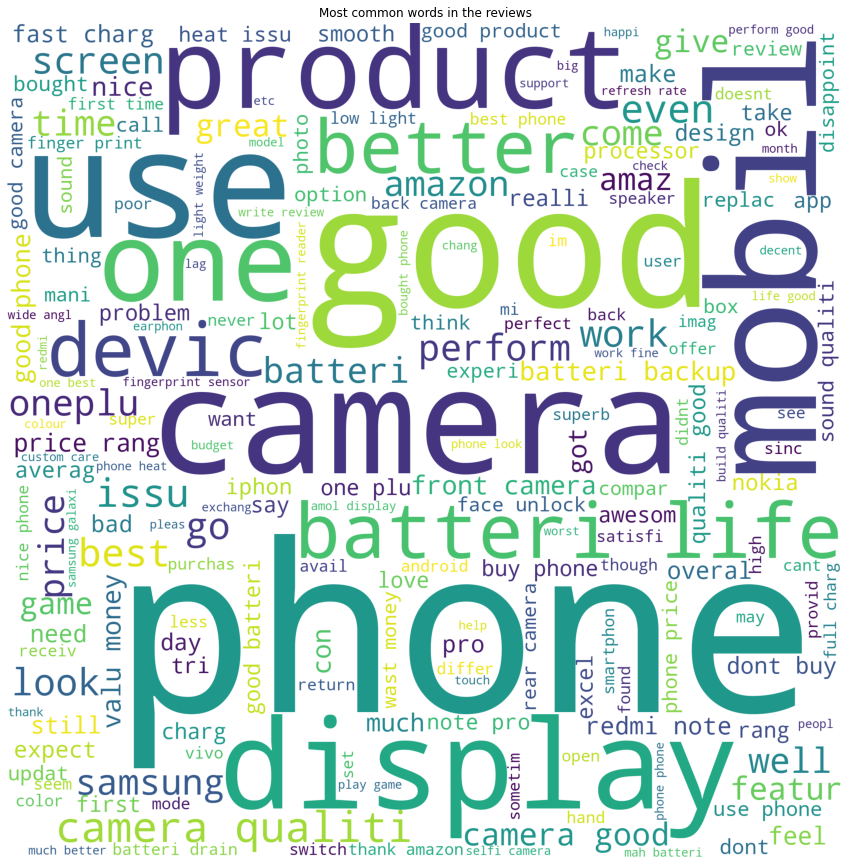

In [241]:
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_content'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in the reviews")
plt.axis('off')
plt.show()

### Analyzing the sentiment of reviews using the library 'vader'

In [242]:
analyser = SentimentIntensityAnalyzer()

Defining a function to find the sentiment of a review. It will return a dictionary having positive, negative and compound scores.

In [243]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

Defining a function to extract only the compound score.

In [244]:
def compound_score(text):
    comp=sentiment_analyzer_scores(text)
    return comp['compound']

In [245]:
df['sentiment_score']=df['content'].apply(lambda x:compound_score(x))

In [246]:
df.sample(5)

,content,cleaned_content,sentiment_score
3955,Not good when I charge mobilebody was earth (current shock) and today charger not working I don’t no how to replace,good charg mobilebodi earth current shock today charger work dont replac,-0.7356
3431,"Switched from Android to iPhone, was different at first but now gotten used to it and loving the apple ecosystem. Camera, Display quality, Power management, Gaming everything is top class in this device.",switch android iphon differ first gotten use love appl ecosystem camera display qualiti power manag game everyth top class devic,0.8201
2490,"camera Quality really really poor front and back both Just Marketing Gimmick 32 mp front is way poorer than samsungs front 5 mp camera and back camera's are full of problems dark photo wide angle is worst that 5 mp samsungs budget phones..only speed,performance,build Quality and Fast Charging are Plus Point Dont go for the camera if u are a pic enthusiast. will update after sometime. Update= Battery is really good 11 hours screen on time with normal app usage like insta youtube chrome chess and whatsapp...",camera qualiti realli realli poor front back market gimmick 32 mp front way poorer samsung front 5 mp camera back camera full problem dark photo wide angl worst 5 mp samsung budget phonesonli speedperformancebuild qualiti fast charg plu point dont go camera u pic enthusiast updat sometim updat batteri realli good 11 hour screen time normal app usag like insta youtub chrome chess whatsapp,-0.6983
2267,"Face detection, camera respose time,battery back up is not upto the mark,i sweep to redmi from samsung was my mistake... they can make cheap product but be ready for cheap output too..not recommend",face detect camera respos timebatteri back upto marki sweep redmi samsung mistak make cheap product readi cheap output toonot recommend,0.7003
4045,"Battery is larger than life. giving me 2 days for a person like me, who has to be on call quiet frequently as i need to connect to my customer's on regular basis. sone pe suhaga, if it had an option of displaying a full contact name just by typing starting 4 numbers. But its a worth product. value for money. you can't expect more in this price segment. thank you Nokia. Well, you can send me a free phone if you want more review on this phone and save you ass which is sailing on a hole in a ship in a sea. LOL, once again thank you.",batteri larger life give 2 day person like call quiet frequent need connect custom regular basi sone pe suhaga option display full contact name type start 4 number worth product valu money cant expect price segment thank nokia well send free phone want review phone save ass sail hole ship sea lol thank,0.9783


We have got the sentiment score. Now categorizing the reviews based on the score into postive, negative and neutral using the below conditions.

In [247]:
def sentiment_category(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

In [248]:
df['review_category']=df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [249]:
df['pred'] = pd.cut(df['sentiment_score'], bins=5, labels=[1, 2, 3, 4, 5])

In [250]:
df.head()

,content,cleaned_content,sentiment_score,review_category,pred
0,"Best camera, very good battery life, eat body material, average weight, best performance, best display.",best camera good batteri life eat bodi materi averag weight best perform best display,0.9501,positive,5
1,"This is best thing you can get at this price from a reputed brand with Made in India tag. First time I ordered on the first day of online launch and am happy. I'm writing after few days of usage, but this should not be different as my experience with Samsung has been most consistent as compared to other mobile brands I've used earlier. Good: - Android 10! Beautiful looks! Finally I can delete SMS from notification now!! - Display is excellent with Blue light filter. - Performance is good. No heating or lagging. Real Racing worked fine. - 6000 Mah battery is BIG - 128 GB storage is pretty good. 512 GB card supported with dedicated external card slot. - Both dedicated sim slots support LTE - Fast charging and 15W charger top with phone. The phone came with 0% charge. Charged fast. - Mobile speakers sound is good, but I prefer external speakers for better bass in music. - Camera is really good. Macro performance is very good - look at skin in tatoo photo and dust perticles in deskphone photo!! (photos of M31 are from other phone). Both front and rear camera support FHD video 3840x2160. I may not require to carry my DSLR everyehere. - Face unlock / figure-print sensor response is good - Received next day by 11 AM ! Not So Good: - Not that thin, but ok. - Doesn't have Samsung Dex - Started to Boot Screen!! Gave me a little shock but selected reboot option and then every thing was smooth. An Android Updated (other than many application updates which is normal in any case) appeared on within days of launch. But update was smooth. No issue at all. - Feels delicate in hand but a Rs.49 cover was good enough. Wrongly ordered black while the set is blue. Just 49 so will reorder the blue one as well :) - Called Samsung Store, but no information with them about availability date. Still no call from them. Feedback - Feels good in hand and in use. It is a powerhouse and you feel it. - Will update after few days of use, but don't have any doubt as of now. Go for it without any doubt.",best thing get price reput brand made india tag first time order first day onlin launch happi im write day usag differ experi samsung consist compar mobil brand ive use earlier good android 10 beauti look final delet sm notif display excel blue light filter perform good heat lag real race work fine 6000 mah batteri big 128 gb storag pretti good 512 gb card support dedic extern card slot dedic sim slot support lte fast charg 15w charger top phone phone came 0 charg charg fast mobil speaker sound good prefer extern speaker better bass music camera realli good macro perform good look skin tatoo photo dust perticl deskphon photo photo m31 phone front rear camera support fhd video 3840x2160 may requir carri dslr everyeher face unlock figureprint sensor respons good receiv next day 11 good thin ok doesnt samsung dex start boot screen gave littl shock select reboot option everi thing smooth android updat mani applic updat normal case appear within day launch updat smooth issu feel delic hand rs49 cover good enough wrongli order black set blue 49 reorder blue one well call samsung store inform avail date still call feedback feel good hand use powerhous feel updat day use dont doubt go without doubt,0.9981,positive,5
2,3rd class front camera. 32 MP front camera n looks like 2mp front camera. In very disappointed with this kind of front camera. Need refund.,3rd class front camera 32 mp front camera n look like 2mp front camera disappoint kind front camera need refund,-0.2247,negative,2
3,"Dear Amazon & samsung you have broke my trust, Lot of noise in images while capturing photos in low light. Rear Camera getting blur in low light.",dear amazon samsung broke trust lot nois imag captur photo low light 

In [251]:
df.to_excel('Review_sentiment.xlsx')

#### Plotting a distribution of the review categories

Text(0.5, 1.0, 'Distribution of Reviews Category')

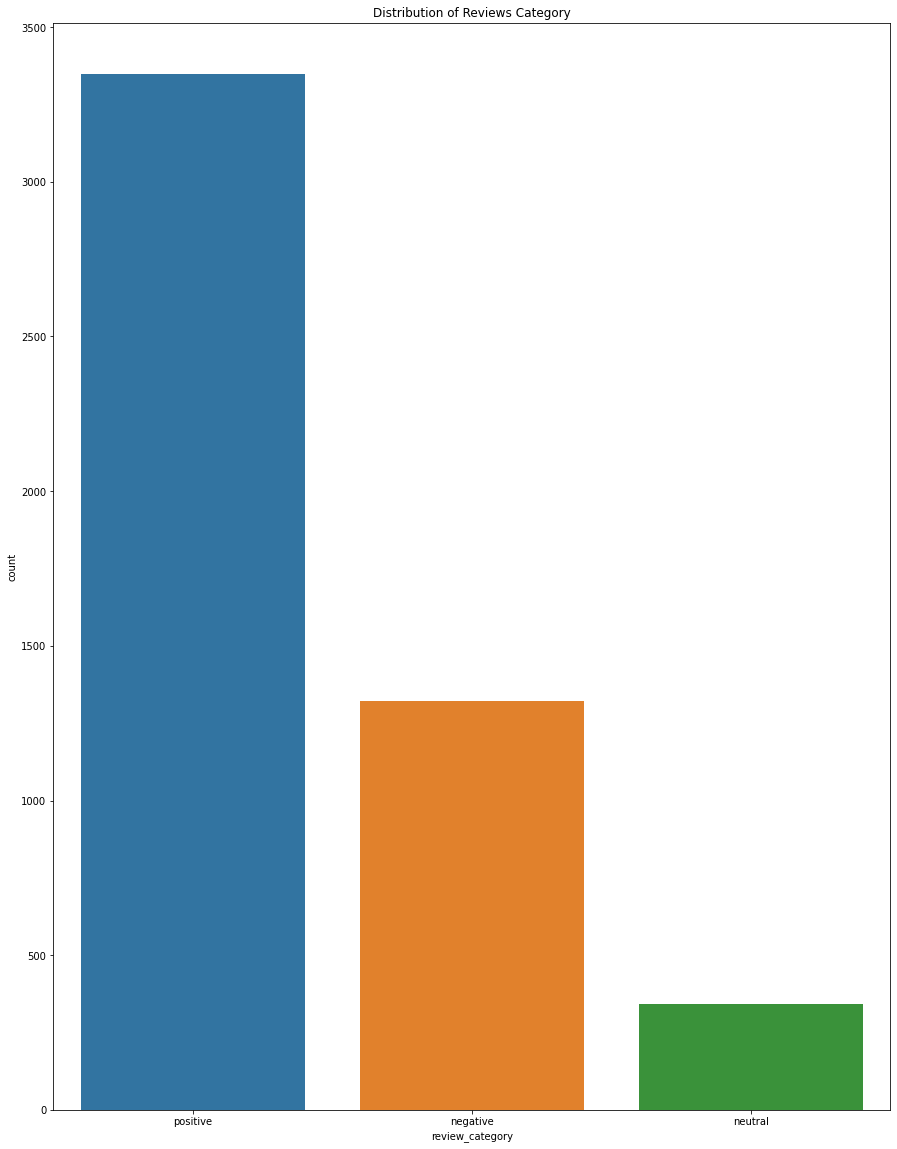

In [203]:
sns.countplot(df['review_category']).set_title("Distribution of Reviews Category")

In [204]:
positive_reviews=df.loc[df['review_category']=='positive','cleaned_content'].tolist() # extracting all positive reviews and converting to a list
positive_reviews[0:5]

['best camera good batteri life eat bodi materi averag weight best perform best display',
 'best thing get price reput brand made india tag first time order first day onlin launch happi im write day usag differ experi samsung consist compar mobil brand ive use earlier good android 10 beauti look final delet sm notif display excel blue light filter perform good heat lag real race work fine 6000 mah batteri big 128 gb storag pretti good 512 gb card support dedic extern card slot dedic sim slot support lte fast charg 15w charger top phone phone came 0 charg charg fast mobil speaker sound good prefer extern speaker better bass music camera realli good macro perform good look skin tatoo photo dust perticl deskphon photo photo m31 phone front rear camera support fhd video 3840x2160 may requir carri dslr everyeher face unlock figureprint sensor respons good receiv next day 11 good thin ok doesnt samsung dex start boot screen gave littl shock select reboot option everi thing smooth android upd

In [205]:
negative_reviews=df.loc[df['review_category']=='negative','cleaned_content'].tolist() # extracting all negative reviews and converting to a list
negative_reviews[0:5]

['3rd class front camera 32 mp front camera n look like 2mp front camera disappoint kind front camera need refund',
 'let begin obviou phone qualiti doesnt meet claim made con 1 camera qualiti pictur qualiti aw wors 8mp camera pixel obviou definit 64mp camera believ claim samsung might make quad camera use macro camera remind decad vga camera common 2 batteri samsung may claim batteri last two day didnt last long netflix prime video heavi game use make two biggest featur useless 3 amazon polici case dont like phone amazon made sure stuck switch 10 day return polici 10 day replac polici dowright wrong hold onto shutter physic mobil store day yet request replac inspect phone buyer site understand fact replac occur almost 10th day purchas still keep uneas pro 1 display screen qualiti good adjust option warm light cold light 2 perform stream video play heavi game smooth first 4 day samsung known fast deterior perform keep eye ear open 3 sound speaker qualiti okay upto mark noisi place fail

#### Generating wordclouds separately for positive and negative reviews

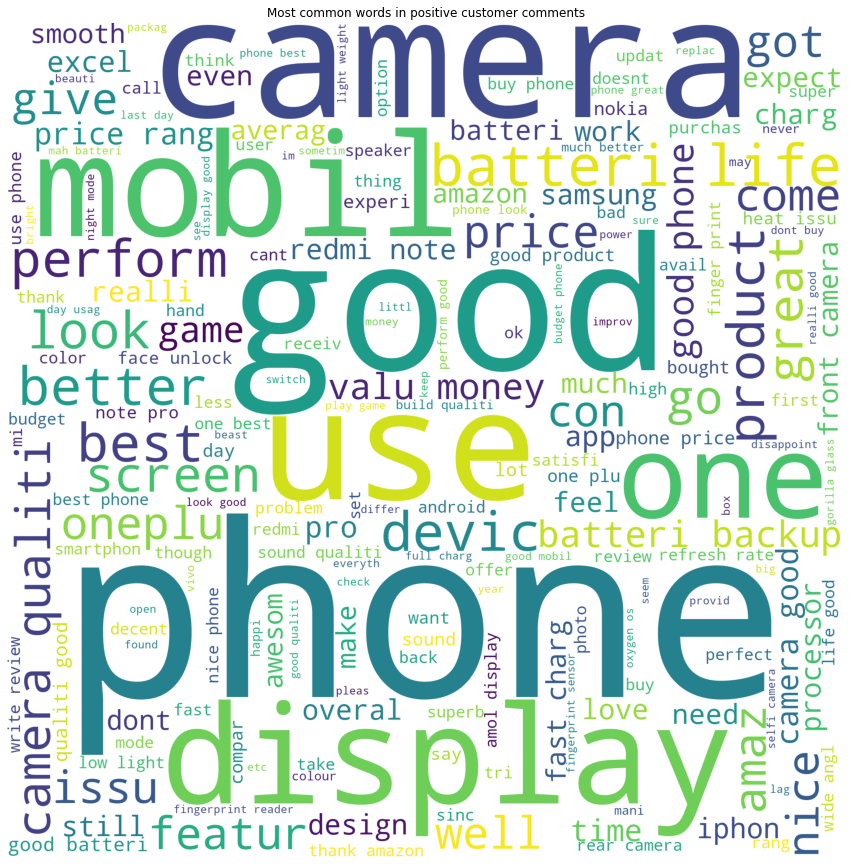

In [208]:
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='positive','cleaned_content'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in positive customer comments")
plt.axis('off')
plt.show()

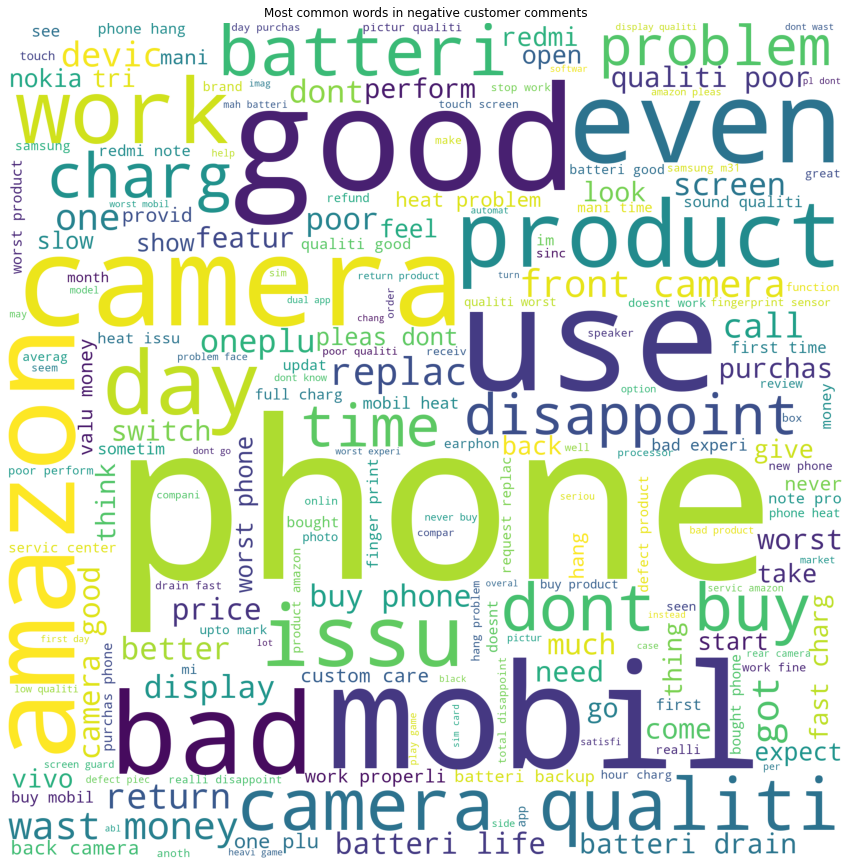

In [209]:
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(df.loc[df['review_category']=='negative','cleaned_content'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words in negative customer comments")
plt.axis('off')
plt.show()

### Unigrams

Unigrams are individual words

Defining a function to get the most common words

In [210]:
def getMostCommon(reviews_list,topn=20):
    reviews=" ".join(reviews_list)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews)
    return freq_counter.most_common(topn) # return words with the highest frequencies

In [211]:
top_20_positive_review_words=getMostCommon(positive_reviews,20)

In [212]:
top_20_positive_review_words

[('phone', 3940),
 ('good', 2865),
 ('camera', 2430),
 ('batteri', 1632),
 ('use', 1350),
 ('qualiti', 1048),
 ('mobil', 1011),
 ('display', 1002),
 ('like', 928),
 ('price', 898),
 ('charg', 884),
 ('best', 853),
 ('one', 853),
 ('look', 807),
 ('product', 794),
 ('day', 789),
 ('great', 734),
 ('also', 688),
 ('samsung', 673),
 ('screen', 639)]

In [213]:
top_20_negative_review_words=getMostCommon(negative_reviews,20)

In [214]:
top_20_negative_review_words

[('phone', 1245),
 ('camera', 659),
 ('good', 434),
 ('qualiti', 426),
 ('mobil', 423),
 ('product', 423),
 ('batteri', 418),
 ('use', 395),
 ('amazon', 375),
 ('buy', 340),
 ('charg', 320),
 ('dont', 314),
 ('time', 304),
 ('work', 299),
 ('like', 279),
 ('day', 268),
 ('bad', 260),
 ('issu', 255),
 ('samsung', 253),
 ('worst', 245)]


Defining a function to produce a barplot of the most common words

In [215]:
def plotMostCommonWords(reviews_list,topn=20,title="Common Review Words",color="blue",axis=None): #default number of words is given as 20
    top_words=getMostCommon(reviews_list,topn=topn)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(topn))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(topn))


Using the above function, to produce barplots for positive and negative reviews separately

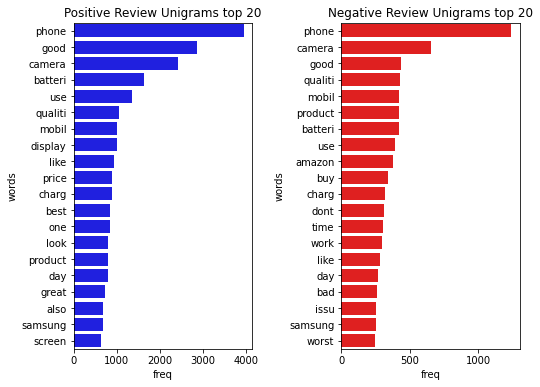

In [216]:
rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image

fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotMostCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])

plotMostCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])

A unigram will not give us a clear understanding as to what is the customer trying to tell. Hence, we use bigrams

### Bigrams


Bigrams are a combination of 2 words

Defining a function to create n-grams. It can be a combination of 2,3,4 or more words. This number can be given as an input to the function argument.

In [217]:
def generateNGram(text,n):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [218]:
positive_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review,2)) for review in negative_reviews]

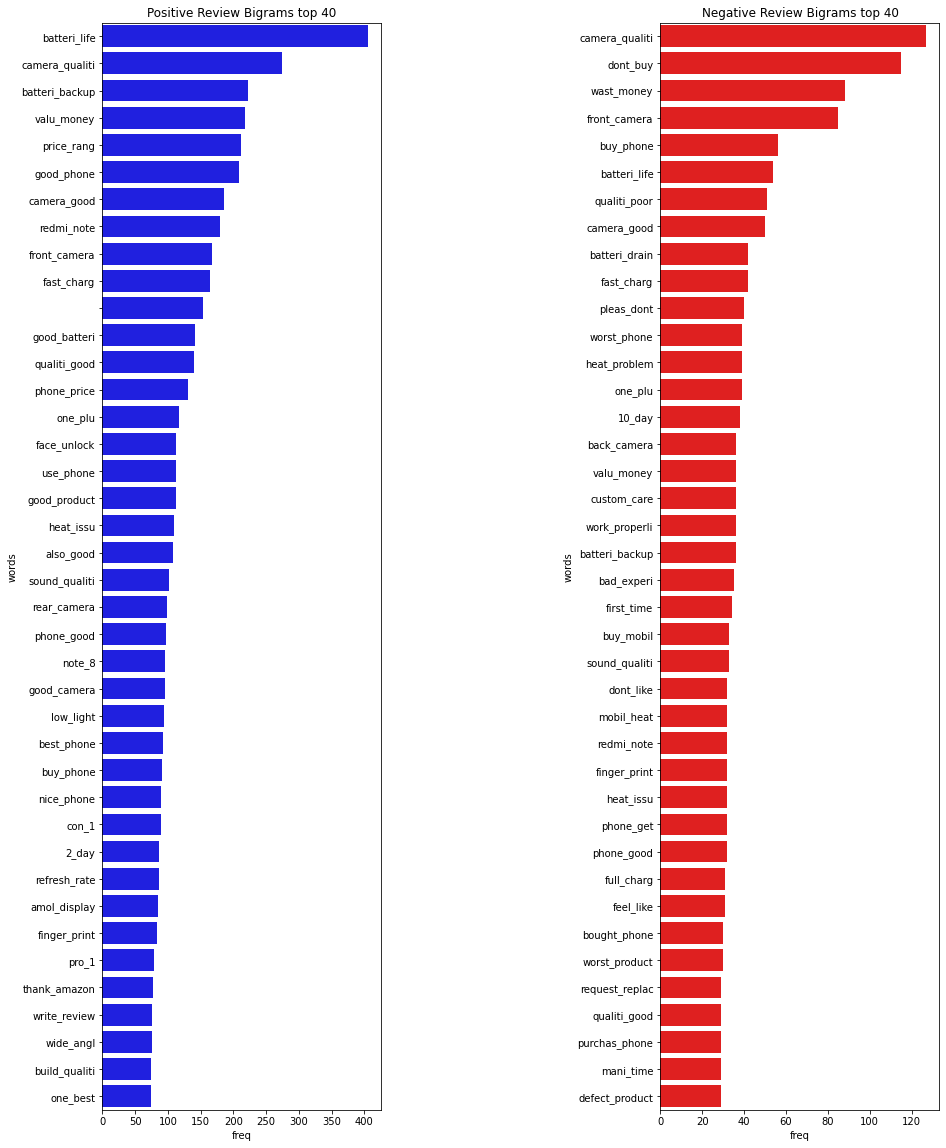

In [219]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1)
plotMostCommonWords(positive_reviews_bigrams,40,"Positive Review Bigrams",axis=ax[0])
plotMostCommonWords(negative_reviews_bigrams,40,"Negative Review Bigrams",color="red",axis=ax[1])